In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(500)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
  
Corpus = pd.read_csv("/content/drive/MyDrive/Uottawa /data science/books_data.csv")
print(Corpus)

     Unnamed: 0 Author                                               Text
0             0      a  befell me in the person of Dr. Jekyll, I could...
1             1      a  was far from truly possessing, “you speak enig...
2             2      a  edition. Shocking murder of an M.P.” That was ...
3             3      a  creature was astute; mastered his fury with a ...
4             4      a  which stood within ran forth. At that time my ...
..          ...    ...                                                ...
995         995      e  Egrets which he was paid to protect. I like to...
996         996      e  hence is widely known as the Eaves Swallow. No...
997         997      e  every night. The island was small and perfectl...
998         998      e  in short, the change is chiefly a psychologica...
999         999      e  and about four feet across the top. At this da...

[1000 rows x 3 columns]


In [ ]:
#Corpus = pd.read_csv('/content/books_data.csv')

In [ ]:
Corpus=Corpus.drop(columns=['Unnamed: 0'])
#df.drop(columns=['B', 'C'])

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
Corpus.head(5)

,Author,Text
0,a,"befell me in the person of Dr. Jekyll, I could..."
1,a,"was far from truly possessing, “you speak enig..."
2,a,edition. Shocking murder of an M.P.” That was ...
3,a,creature was astute; mastered his fury with a ...
4,a,which stood within ran forth. At that time my ...


In [ ]:
from google.colab import data_table
data_table.DataTable(Corpus, include_index=False, num_rows_per_page=1)

,Author,Text
0,a,"befell me in the person of Dr. Jekyll, I could..."
1,a,"was far from truly possessing, “you speak enig..."
2,a,edition. Shocking murder of an M.P.” That was ...
3,a,creature was astute; mastered his fury with a ...
4,a,which stood within ran forth. At that time my ...
...,...,...
995,e,Egrets which he was paid to protect. I like to...
996,e,hence is widely known as the Eaves Swallow. No...
997,e,every night. The island was small and perfectl...
998,e,"in short, the change is chiefly a psychologica..."


In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
y = Corpus['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
# Importing necessary libraries
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not in stopwords.words('english')]

In [ ]:
X = Corpus['Text']

In [ ]:
print(X)

0      befell me in the person of Dr. Jekyll, I could...
1      was far from truly possessing, “you speak enig...
2      edition. Shocking murder of an M.P.” That was ...
3      creature was astute; mastered his fury with a ...
4      which stood within ran forth. At that time my ...
                             ...                        
995    Egrets which he was paid to protect. I like to...
996    hence is widely known as the Eaves Swallow. No...
997    every night. The island was small and perfectl...
998    in short, the change is chiefly a psychologica...
999    and about four feet across the top. At this da...
Name: Text, Length: 1000, dtype: object


befell me in the person of Dr. Jekyll, I could enter on that of Edward Hyde without pecuniary loss. And thus fortified, as I supposed, on every side, I began to profit by the strange immunities of my position. Men have before hired bravos to transact their crimes, while their own person and reputation sat under shelter. I was the first that ever did so for his pleasures. I was the first that could plod in the public eye with a load of genial respectability, and in a moment, like a schoolboy, strip off these lendings and spring headlong into
a


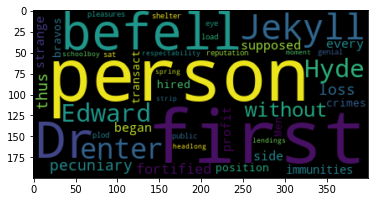

was far from truly possessing, “you speak enigmas, and you will perhaps not wonder that I hear you with no very strong impression of belief. But I have gone too far in the way of inexplicable services to pause before I see the end.” “It is well,” replied my visitor. “Lanyon, you remember your vows: what follows is under the seal of our profession. And now, you who have so long been bound to the most narrow and material views, you who have denied the virtue of transcendental medicine, you who have derided your superiors—behold!” He put the glass to
a


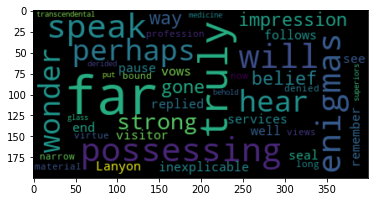

creature was astute; mastered his fury with a great effort of the will; composed his two important letters, one to Lanyon and one to Poole; and that he might receive actual evidence of their being posted, sent them out with directions that they should be registered. Thenceforward, he sat all day over the fire in the private room, gnawing his nails; there he dined, sitting alone with his fears, the waiter visibly quailing before his eye; and thence, when the night was fully come, he set forth in the corner of a closed cab, and was driven to and fro
a


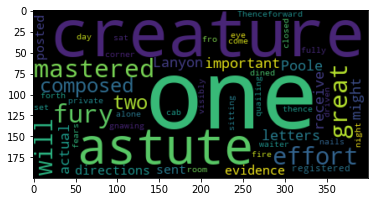

In [ ]:
# Importing necessary libraries
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = Corpus['Text']
wordcloud1 = WordCloud().generate(X[0])
wordcloud2 = WordCloud().generate(X[1]) 
wordcloud3 = WordCloud().generate(X[3]) 
print(X[0])
print(Corpus['Author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X[1])
print(Corpus['Author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(X[3])
print(Corpus['Author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

In [ ]:
# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234)
# defining the bag-of-words transformer on the text-processed corpus
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
# transforming into Bag-of-Words
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)

In [ ]:
# SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(text_bow_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(text_bow_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score:",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score: 91.5


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_SVM))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.83      0.89      0.86        44
           2       1.00      0.95      0.97        41
           3       0.92      0.94      0.93        35
           4       1.00      0.95      0.97        41

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



Normalized confusion matrix
[[0.84615385 0.1025641  0.         0.05128205 0.        ]
 [0.09090909 0.88636364 0.         0.02272727 0.        ]
 [0.04878049 0.         0.95121951 0.         0.        ]
 [0.         0.05714286 0.         0.94285714 0.        ]
 [0.         0.04878049 0.         0.         0.95121951]]


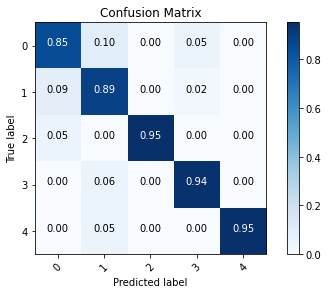

In [ ]:

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
# Defining a module for Confusion Matrix...
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test,predictions_SVM)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2,3,4], normalize=True,
                      title='Confusion Matrix')

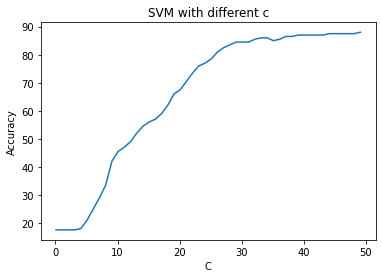

In [ ]:
x=[]
y=[]
for i in np.arange(0.1,50,1):
  x.append(i)
  SVM = svm.SVC(C=i, kernel='sigmoid', degree=3, gamma='auto')
  SVM.fit(text_bow_train,y_train)
  # predict the labels on validation dataset
  predictions_SVM = SVM.predict(text_bow_test)
  # Use accuracy_score function to get the accuracy
  y.append(accuracy_score(predictions_SVM, y_test)*100)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM with different c") 
plt.show()

In [ ]:
y

[17.5,
 17.5,
 17.5,
 17.5,
 18.0,
 21.0,
 25.0,
 28.999999999999996,
 33.5,
 42.0,
 45.5,
 47.0,
 49.0,
 52.0,
 54.50000000000001,
 56.00000000000001,
 56.99999999999999,
 59.0,
 62.0,
 66.0,
 67.5,
 70.5,
 73.5,
 76.0,
 77.0,
 78.5,
 81.0,
 82.5,
 83.5,
 84.5,
 84.5,
 84.5,
 85.5,
 86.0,
 86.0,
 85.0,
 85.5,
 86.5,
 86.5,
 87.0,
 87.0,
 87.0,
 87.0,
 87.0,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 88.0]

In [ ]:
#K-fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=123)
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
cv_scores = cross_val_score(SVM,text_bow_train,y_train,cv=kf)

In [ ]:
cv_scores

array([0.925 , 0.9125, 0.95  , 0.925 , 0.9   , 0.9375, 0.925 , 0.9375,
       0.9   , 0.8875])

In [ ]:
cv_scores.mean()

0.9199999999999999